<a href="https://colab.research.google.com/github/tataev/Python/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B2%D0%B0%D0%BA%D0%B0%D0%BD%D1%81%D0%B8%D0%B9_HH_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для начала импортируем необходимые библиотеки

In [26]:
#подключаем библиотеку для хранения и обработки табличных данных
import pandas as pd
# подключаем библиотеки для визуализации
import matplotlib.pyplot as plt
# прописываем команду, чтобы график выводился сразу в нашем блокноте
%matplotlib inline

#### Запустим скрипт (парсер) для получения информации о вакансиях с сайта hh.ru
Просто запустите эту ячейку, разбираться в ней не нужно


In [27]:
#подключим необходимые библиотеки
import requests      # Для запросов по API
from tqdm import tqdm #для отображения прогресса

number_of_pages = 100

job = "системный администратор"
names = []
area = []
employer = []
salary = []
snippet = []
schedule = []
currency = []
for i in tqdm(range(number_of_pages)):
    url = f'https://api.hh.ru/vacancies?area=113&professional_role=10&professional_role=96&search_field=name&search_field=company_name&search_field=description&only_with_salary=true&text=%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA+%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85&from=suggest_post&page={i}'
    #par = {'text': job, 'area':'113','per_page':'100', 'page':i, 'only_with_salary':'true'}
    r = requests.get(url)

    data = r.json()
    for d in data['items']:
        if 'системный' not in d['name']:
            names.append(d['name'])
            employer.append(d['employer']['name'])
            area.append(d['area']['name'])
            if (d['salary']['to'] != None) and (d['salary']['from'] != None):
                salary.append((d['salary']['from']+d['salary']['to']/2))
            elif d['salary']['from'] is None:
                salary.append(d['salary']['to'])
            else:
                salary.append(d['salary']['from'])
            currency.append(d['salary']['currency'])                                          
            schedule.append(d['schedule']['name'])
            snippet.append(d['snippet']['requirement'])
        
df = pd.DataFrame({'name':names, 
                   'city':area, 
                   'employer':employer, 
                   'salary':salary,
                   'currency':currency,  
                   "requirement":snippet, 
                   'schedule':schedule})

filename = 'vacancy.csv'
df.to_csv(filename, sep=',', index=False)

print(f'\nДанные собраны в файл {filename}')

100%|██████████| 100/100 [00:57<00:00,  1.73it/s]


Данные собраны в файл vacancy.csv


#### Загрузим наши данные и посмотрим на них

---



---



Параметры 
<ul>
<li><strong>df</strong> - имя нашей таблицы </li>
<li><strong>read_csv</strong> - функция, при помощи которой мы открываем csv файл (для других типпов файлов - другой параметр у read, например, read_xslx) </li>
<li><strong>'vacancy.csv'</strong> - путь и имя файла, который мы хотим открыть (<em>оно обязательно должно быть в кавычках</em>)</li>
</ul>

In [28]:
df = pd.read_csv('vacancy.csv')

In [29]:
#Вызовем функцию, чтобы посмотреть первые строк нашей таблицы. 
df.head()

,name,city,employer,salary,currency,requirement,schedule
0,Бизнес-аналитик (стажёр),Москва,Ельмикеев Евгений Иванович,25000.0,RUR,Главная задача должности бизнес-<highlighttext...,Удаленная работа
1,Аналитик,Москва,"Сково,Торговый дом",78000.0,RUR,Высшее образование. Опыт работы в аналогичной ...,Полный день
2,Менеджер аналитик по развитию Маркетплейс,Москва,Щербицкая Н.Н.,210000.0,RUR,Продвинутое знание и владение Excel. Аналитиче...,Удаленная работа
3,Аналитик данных,Москва,Детские продукты,144000.0,RUR,Умение выделять из массива значимые <highlight...,Полный день
4,Аналитик (Маркетплейс),Москва,Грицаенко Елена Викторовна,50000.0,RUR,Опыт работы в сфере <highlighttext>аналитики</...,Удаленная работа


Наша таблица состоит из следующих полей:


*   name - название вакансии
*   city - город 
*   employer - название комапании-работадателя
*   salary - зарплата
*   cyrrency - валюта зарплаты
*   requirement	- описание требований вакансии
*   schedule - тип занятости



In [30]:
#посмотрим сколько всего у нас собрано вакансий - количество строк и колонок (-1)
df.shape

(1250, 7)

In [31]:
#так же посмотрим последние строки 
df.tail()

,name,city,employer,salary,currency,requirement,schedule
1245,Senior C/C++ Engineer (switch to Julia),Краснодар,Advantage Solutions,6000.0,USD,"...<highlighttext>данных</highlighttext>, патт...",Удаленная работа
1246,Senior C/C++ Engineer (switch to Julia),Воронеж,Advantage Solutions,6000.0,USD,"...<highlighttext>данных</highlighttext>, патт...",Удаленная работа
1247,Младший специалист HR (по оценке сотрудников),Елабуга,"Алабуга, ОЭЗ ППТ",70000.0,RUR,Желание развиваться в сфере HR. Грамотная устн...,Полный день
1248,Senior C/C++ Engineer (switch to Julia),Нижний Новгород,Advantage Solutions,6000.0,USD,"...<highlighttext>данных</highlighttext>, патт...",Удаленная работа
1249,Senior C/C++ Engineer (switch to Julia),Казань,Advantage Solutions,6000.0,USD,"...<highlighttext>данных</highlighttext>, патт...",Удаленная работа


#### Немного обработаем (очистим) нашу таблицу

Видим, что у у нас "затесались" вакансии, в описании которых было слово "аналитик", но сама вакансия не об этом. Оставим только аналитиков

Параметры 
<ul>
<li><strong>searchfor</strong> - список, в котором мы укажем все слова, подходящие нашей вакансии </li>
<li><strong>.str.contains()</strong> - функция для поиска нужных нам значений по шаблону  </li>
<li><strong>'|'.join(searchfor)</strong> - создание самого шаблона из списка . "|" - значит что слова объединяются через оператор ИЛИ</li>
</ul>

In [32]:
searchfor = ['администратор', 'Администратор', 'Administrator', 'Admin']
df = df[df['name'].str.contains('|'.join(searchfor))].reset_index(drop=True)

Как мы видим, в таблице есть столбец "currency", отвечающий за валюту. 
Это значит, что скорее всего, зарплата может быть не только в рублях, а чтобы ее можно было корректно сравнивать, нужно все зарплаты перевести в рубли. 
<em>Для начала давайте проверим, верна ли наша догадка.</em> 

In [33]:
#попробуем вывести уникальные значения из столбца currency
df['currency'].unique()

array(['RUR'], dtype=object)

Мы воспользовались функцией <em>.unique()</em>, которая выводит уникальные значения.


In [34]:
# чтобы не усложнять задачу, возьмем средний курс валют за октябрь с сайта ЦБ РФ и поместим его в словарь curr
curr = {'USD':61, 'EUR':60}

#создадим новый столбец salary_rur в таблице и пересчитаем зарплату для него 
df['salary_rur'] = df['salary'] * df['currency'].apply(lambda x: 1 if x == 'RUR' else curr[x])

Как это работает
<ul>
<li><strong>df['salary_rur']</strong> - мы создаем новую строку в таблице с названием 'salary_rur' и задаем условие как она будет формироваться</li>
<li><strong>df['salary'] * df['currency'].apply(lambda x: 1 if x == 'RUR' else curr[x])</strong> - каждая строка из столбца <em>salary</em> умножается на каждое значение слобца <em>currency</em>, к которому применена функция</li>
<li><strong>.apply()</strong> - функция, которая позволяет передать в неё другую функцию, которая будет применена к каждой строке </li>
<li><strong>lambda</strong> - ключевое слово, которое создает безымяную функцию, которая используется в коде только один раз</li>
<li><strong>(lambda x: 1 if x == 'RUR' else curr[x])</strong> - если в столбце, к которому применили функцию значение (мы назвали его х) равно 'RUR', то следует использовать значение равным единице, если же другое - то значение из словоря по ключу (x) из словаря <em>curr</em>. Для примера, если значение равно USD, то ключ в словаре <em>curr</em> совпадает со значением 61</li>
</ul>

##### Давайте посчитаем медианную зарплату аналитиков
Для этого воспользуемя функцией <strong>.median()</strong> и применим ее к столбцу, в котором нужно высчитать медиану

In [35]:
df['salary_rur'].median()

115000.0

## Приступим к визуализации

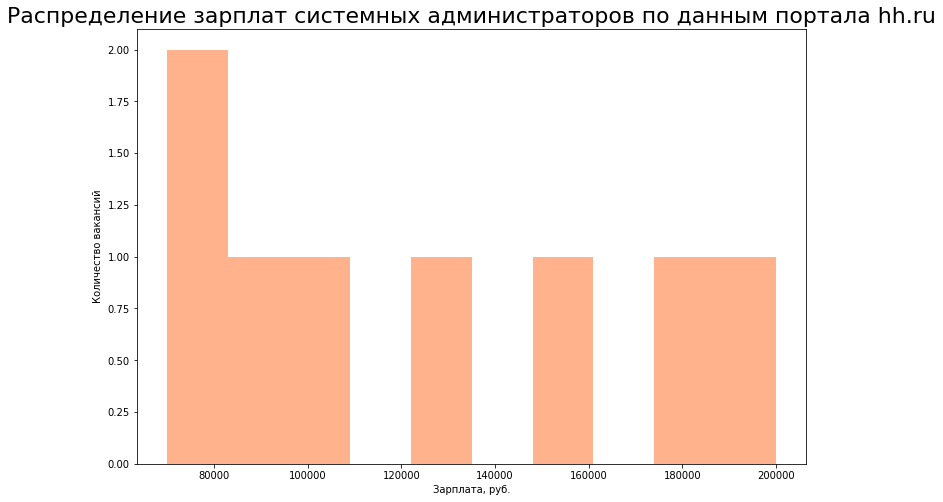

In [36]:
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(df['salary_rur'], 
                            10, stacked=False, 
                            density=False, 
                            color='#ffb28b')
plt.title("Распределение зарплат системных администраторов по данным портала hh.ru", fontsize=22)
plt.xlabel('Зарплата, руб.')
plt.ylabel("Количество вакансий")
plt.show()

##### Как же это работает? Давайте разберем на следующем примере

#### Выберем топ-10 городов по средней зарплате аналитиков

Для начала создадим новую таблицу с интересующими нас значениями 
<ul>
<li><strong>df.groupby('city', as_index=False)</strong> задаем значения, по которым будет происодить группировка (по столбцу <em>city</em>)</li>
<li><strong>agg()</strong> задаем каким образом и что мы будем группировать. В эту функцию обязательно нужно передать словарь. </li>
<li><strong>{'salary_rur':'mean'}</strong> - словарь, в котором мы передаем название столбца (<em>salary_rur</em>) и функцию которую нужно применить <em>mean</em>  среднее значение</li>
<li><strong>.nlargest(10, 'salary_rur')</strong> функция, которая показывает n самых больших значений. 10 - количество, которое мы хотим получить, <em>salary_rur</em> - столбец по которому мы ищем наибольшие значения</li>
<li><strong>.round(2)</strong> - округляем результат до 2 знаков после запятой</li>
</ul>

In [37]:
df_median_salary = df.groupby('city', as_index=False).agg({'salary_rur':'median'}).round(2)
top = df_median_salary.nlargest(10, 'salary_rur')

<details> <summary>Нажмите сюда, чтобы увидеть список аггрегатных функций</summary>


<ul>
<li><strong>min</strong> - минимальное значение</li>
<li><strong>max</strong> - максимальное значение</li>
<li><strong>count</strong> - количество</li>
<li><strong>mean</strong> - среднее значение</li>
<li><strong>median</strong> - медиана</li>

</ul>



</details>


In [38]:
#выведем получившуюся таблицу (10)
top

,city,salary_rur
1,Москва,150000.0
3,Сочи,100000.0
2,Набережные Челны,92707.5
0,Краснодар,75000.0


Построим соответствующую столбчатую диаграмму

Создадим график
<ul>
<li><strong>plt.figure()</strong> - мы создаем объект для графика (по сути - область, где будет выводиться диаграмма)</li>
<li><strong>figsize=(14,8)</strong> - размеры графика (ширина и высота) в дюймах</li>
<li><strong>plt.title</strong> Указываем название графика. <strong>fontsize=22</strong> - размер шрифта (22)</li>
<li><strong>plt.bar()</strong> Создаем сам график (bar - столбчатый график). <strong>top['city'],top['salary_rur']</strong> - оси X и Y, в нашем случае это столбцы </li>
<li><strong>color='#24d6ca'</strong> задаем цвет столбцов. Можно использовать HEX-палитру или писать названия цветов на английском ('red', 'yellow' и т.д.)</li>
<li><strong>plt.xlabel/plt.ylabel</strong> - задаем названия осей.</li>
<li><strong>plt.show()</strong> показать график </li>
</ul>

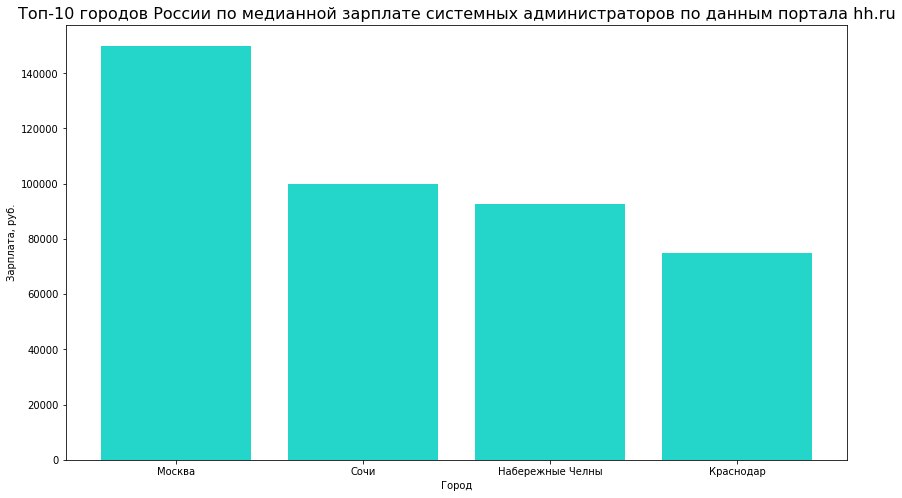

In [39]:
plt.figure(figsize=(14,8))

plt.title("Топ-10 городов России по медианной зарплате системных администраторов по данным портала hh.ru", fontsize=16)
plt.bar(top['city'],top['salary_rur'], color='#24d6ca')

plt.xlabel('Город')
plt.ylabel("Зарплата, руб.")
plt.show()

##### Самостоятельная работа

#### Сделайте визуализацию топ-10 вакансий с самой высокой зарплатой

1. Создайте таблицу для топ-10 вакансий (столбец name) 

In [40]:
# df_median_salary = df.groupby('city', as_index=False).agg({'salary_rur':'median'}).round(2)
# top = df_median_salary.nlargest(10, 'salary_rur')

# Наша таблица состоит из следующих полей:

#     name - название вакансии
#     city - город
#     employer - название комапании-работадателя
#     salary - зарплата
#     cyrrency - валюта зарплаты
#     requirement - описание требований вакансии
#     schedule - тип занятости



df_max_salary = df.groupby('name', as_index=False).agg({'salary_rur':'max'}).round(2)
top = df_max_salary.nlargest(10, 'salary_rur')

<details> <summary>Нажмите сюда, чтобы увидеть пример кода</summary>


```python
df_max_salary = df.groupby('name', as_index=False).agg({'salary_rur':'max'}).round(2)
top = df_max_salary.nlargest(10, 'salary_rur')
```








In [41]:
#выедем таблицу 
top

,name,salary_rur
1,Администратор Bitrix 24/ программист/разработчик,200000.0
7,Сетевой администратор-аналитик (направление ки...,180000.0
6,Разработчик/Аналитик/Администратор 1С,150000.0
2,Администратор Битрикс 24 (в офис),130000.0
3,Администратор Битрикс 24 (офис),100000.0
0,Администратор BI,92707.5
4,Администратор сайта,75000.0
5,Помощник аналитика / Администратор-аналитик,70000.0


2. Создайте соответсвующий график. Подберите для него цвет который вам нравится.

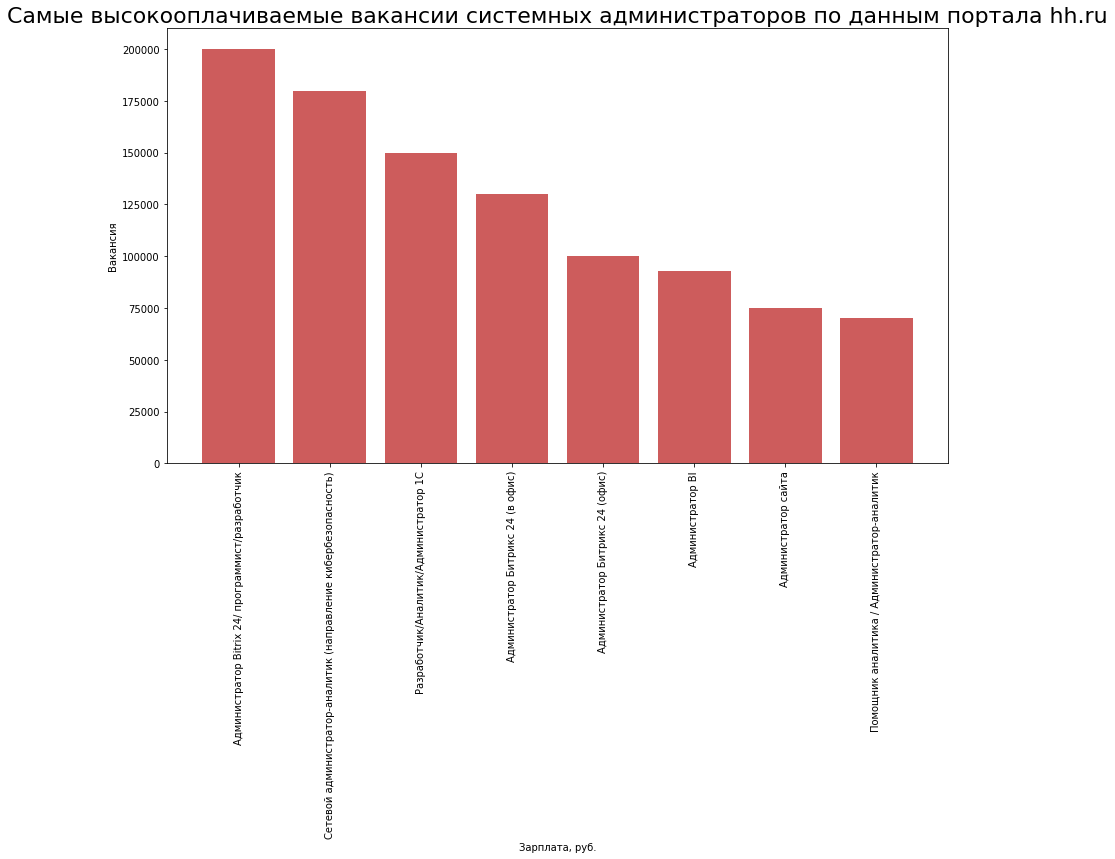

In [42]:
# plt.figure(figsize=(14,8))

# plt.title("Топ-10 городов России по медианной зарплате аналитиков по данным портала hh.ru", fontsize=16)
# plt.bar(top['city'],top['salary_rur'], color='#24d6ca')

# plt.xlabel('Город')
# plt.ylabel("Зарплата, руб.")
# plt.show()

# Дополните код - замените занки решетки на необходимые значения
plt.figure(figsize=(14,8))
# plt.figure(figsize=('14', '8'))

plt.title("Самые высокооплачиваемые вакансии системных администраторов по данным портала hh.ru", fontsize=22)
# plt.bar(top['city'],top['salary_rur'], color='#24d6ca')
plt.bar(top['name'],top['salary_rur'], color='#CD5C5C')
# plt.bar('name', 'salary_rur' color='black')

plt.xlabel('Зарплата, руб.')
plt.ylabel("Вакансия")

#Это строка поворачивает метки оси Х на 90 градусов, чтобы текст не накладывался друг на друга
plt.tick_params(axis='x', rotation=90)

plt.show()

<details> <summary>Нажмите сюда, чтобы увидеть пример кода</summary>


```python

plt.figure(figsize=(14, 10))

plt.title("Самые высокооплачиваемые вакансии системных администраторов по данным портала hh.ru", fontsize=22)
plt.bar(top['name'],top['salary_rur'], color='#FFB02E')

plt.xlabel('Зарплата, руб.')
plt.ylabel("Вакансия")
#Это строка поворачивает метки оси Х на 90 градусов, чтобы текст не накладывался друг на друга
plt.tick_params(axis='x', rotation=90)

plt.show()






